# Introduction to Tests for Categorical Data


### Data Science 410


## Introduction





## Tests for Categorical Data

So far, we have been investigating tests for data with continious values. But, many data types are categorical where we work with count statistics. What tests can we apply to these?

### Pearson's Chi-Squared Test

One of the earliest tests for count data was developed by Karl Pearson around 1900. Dispite its age, this test is still used today. The Pearson Chi-squared test (also written as $\chi$-squared) has the following properties:

- It is an unpaired test for counts in different categories.
  - These categories must be mutually exclusive. For example, does the patient have cancer? (yes/no)
  - Test if the two categories differ in WBC count.
  - Rolling a die. (1,2,3,4,5,6)
  - Test if the six categories occur the same (fair die).
  - Does a tweet contain a specific word? (yes/no)
  - test if the two categories differ in tweet length or word count.
- Tests if different categories differ in some specific value.
- The Chi-squared statistic depends on the ‘degrees of freedom’ of the test.
  - This is equal to n-1.  Where n equals the number of different categories.
- The test looks at the sum of the outcome differences from expectations.
- Chi-squared is also used for a ‘goodness of fit’ test. Test if sample is representative of population.
  - Test if your sample has expected make up of categories.
  - For example, if our population is 50-50 men-women, then we test if our sample is different from those expected probabilities.

The density of the $\chi$-squared distribution depends on the degrees of freedom.

![](img/Chi-square.png)

As with any probability density function, confidence intervals and p-values can be computed. Notice that the $\chi$-squared distribution becomes flatter and with greater dispursion as the degrees of freedom increase. In practice, this means that you will need large samples to get a meaningful result if you have too many choices in your test. 

### Karl Pearson

Karl Pearson was the dean of late 19th and early 20th century mathematical statisticians. Pearson was a student of Frances Gaulton, the inventor of the regression method. Willam Sealy Gossett was one of Pearsons's students. This realationship is said to be the insparation for Gossett's pseudonym 'Student'. 

![Karl Pearson in 1912: A scary looking statistics professor](img/Karl_Pearson_1912.jpg) 

<center>**Karl Pearson in 1912:** A scary looking statistics professor!</center>

In many ways Pearson's infuluence on the mathematical foundations of statistics is still with us more than a century latter. Most unfortunately, Pearson was also a eugenicist and a raceist. His misuse of statistics in this area tarnished his legacy.

### Building a Chi-squared table

The traditional way to apply a Chi-squared test is to first create a Chi-squared table. In this example we are looking the results of an A-B test with three possible outcomes. For example, this type of test might be applied to determine if a new web site drives more customer purchases. 

the code in the cell below builds a simple Chi-squared table. The columns in the data frame are:

- The actual occurance of events.
- The expected probability of these events. This is the distribution of the null hypothesis.
- The expected occurance of events given the expected probabilities.
- The difference between the occurance and the expected number of events.
- The square of the difference.
- The squared difference normalized by the expected number of occurances. The sum of these figures in the Chi-squared statistic. 

Execute the code and examine the results. 

In [32]:
import pandas as pd
ab_data = pd.DataFrame({'Action':['Leave Page', 'Continue Purchase', 'Add More to Purchase'],
                       'occurrence':[55,43,22],
                       'expected_per':[0.6,0.3,0.1]})
sum_occurrence = ab_data.loc[:, 'occurrence'].sum()
ab_data.loc[:, 'expected_occurance'] = sum_occurrence * ab_data.loc[:, 'expected_per']
ab_data.loc[:, 'diff'] = ab_data.loc[:, 'occurrence'] - ab_data.loc[:, 'expected_occurance'] 
ab_data.loc[:, 'sqr_diff'] = ab_data.loc[:, 'diff'].apply(lambda x: x**2)
ab_data.loc[:, 'diff_expect'] = ab_data.loc[:, 'sqr_diff'].div(ab_data.loc[:, 'expected_occurance'], axis='index')
ab_data = ab_data.append({'Action': 'Totals',
                      'occurrence': sum_occurrence,
                       'expected_per':  [np.nan],
                      'expected_occurance': [np.nan],
                      'diff': [np.nan],
                      'sqr_diff': [np.nan],
                      'diff_expect': ab_data.loc[:, 'diff_expect'].sum()}, 
                        ignore_index =  True)
ab_data = ab_data[['Action', 'occurrence', 'expected_per', 'expected_occurance', 'diff', 'sqr_diff', 'diff_expect']]
ab_data                                       

,Action,occurrence,expected_per,expected_occurance,diff,sqr_diff,diff_expect
0,Leave Page,55,0.6,72,-17,289,4.013889
1,Continue Purchase,43,0.3,36,7,49,1.361111
2,Add More to Purchase,22,0.1,12,10,100,8.333333
3,Totals,120,[nan],[nan],[nan],[nan],13.708333


This Chi-squared table is interpreted as follows:

- The $\chi$-squared test statistic is 13.708, which is computed as the sum of the squared differences normalized by the expected occurances.
- The $\chi$-squared distribution has (3 Outcomes - 1) = 2 degrees of freedom.
- Degree of freedom is the number of outcome options (3) minus 1.

Run the  code in the cell below to compute the p-value of the chi-squared test with the `scipy.stata.chi2.cdf` function.

In [33]:
import scipy.stats as ss
1 - ss.chi2.cdf(13.7, df = 2)

0.0010594556929076626

This p-value is rather small. Evidently, there is a small chance that the  differences between the occuranaces and expected occurances are from random variation alone. 

In the foregoing example we computed the Chi-squareed statistic and p-value directly. In general, this is a somewhat cumbersom approach. Instead, we can use the `chisquare` function from the `scipy.stats` package as shown in the code below. Execute this code and examine the results. 

In [34]:
chisq, pvalue = ss.chisquare(ab_data.loc[:, 'occurrence'][:3], 
             ab_data.loc[:, 'expected_occurance'][:3])
print('Chi Squared statistic = ' + str(chisq))
print('P=value = ' + str(pvalue))

Chi Squared statistic = 13.708333333333334
P=value = 0.00105505047809


The difference between the expected and observed number of occurances is significant. The large Chi-squared value on 2 degrees of freedom and the small p-value indicate we can reject the null hypothesis that the observed occurances follow the same distribution as the expected occurances. There is a low chance that this difference occurs from random variation alone. 

Finally, we should check the power of our test. Execute the code in the cell below and examine the results. In this case, we will use the `power_divergence` function from the `scipy.stats` package. Execute this code to determine if this test has reasonable power.

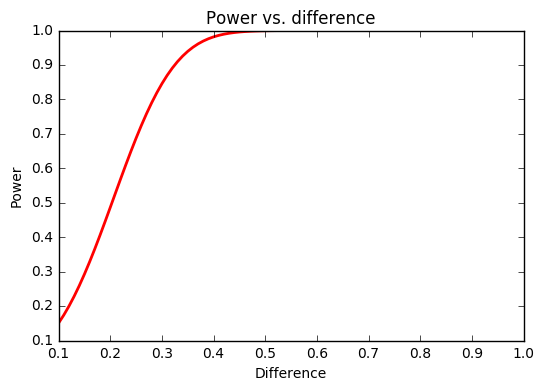

In [35]:
import statsmodels.stats.power as ssp
diffs = np.arange(start = 0.1, stop = 1.0, step = 0.01) 
powers = ssp.GofChisquarePower().solve_power(effect_size = diffs, nobs=120, n_bins = 3, alpha=0.05)
plot_power(diffs, powers, xlabel = 'Difference', title = 'Power vs. difference') 

Apparently, this test is quite powerful, and we could have detected much smaller differencecs between the observed and expected counts. 

**Your Turn!** As you have observed, the test is quite powerful with 120 observations. But, what if we do not have a smaple this large. Compute and plot the power of the Chi-squared test for an effect size of 1.0 at sample sizes in the range $\{ 10, 100\}$. The `nobs` argument to the `GofChisquarePower` is the sample size. 

Examine your results. At a sample size of 30 is the power of the test approximately 1.0? 

### Fisher's Exact Test

The assumptions behind the Chi-squared statistic breakdown when the sample size is small (e.g. number of occurances $\le 10$). In this case you can use Fisher's Exact Test. In practice Fisher's exact test is rarely used, but it is interesting  to think about it anyway. 

According to the story, in 1911 Ronald Fisher worked in the same institutioin with a talented aquatic botanist, Dr. Muriel Bristol, who was quite particular about how her tea was served. Dr. Bristol told Fisher that she could tell the difference between cups of tea where the milk had been poured into the cup before or after the tea was poured. 

![](img/Bristol.png)
<center>**Dr Murel Bristol**, noted algal botanist, and quite particular about her tea.

Fisher, was a bit skeptical. He challenged Dr. Britol to a test. In the test Fisher prepared eight cups of tea. Four of the cups of where prepared in Dr. Bristol's prefered manner and the other four the other way. The tea was prepare out of sight of Dr. Bristol. However, she knew that there were four cups prepared each way. The order of preparation of each cup of tea was randomized. Fisher served the cups of tea to Dr. Bristol and asked her how the tea had been poured. In every case, she was correct!

Fisher devised a **purmutation test** to determine the likelihood that Dr Bristol could have simiply guessed the correct outcome. He devised the following purmuation table for the chances of success:

![](img/tea.png)

The possible purmuations of possible ways that Dr Bristol could have correctly (sucess) or incorrectly identified the way each cup of tea was prepared:

$$\frac{8!}{4!(8-4)!} = 70$$

So, the chance that the Dr Bristol could purely guess (by random chance) the outcome is only 1 in 70 or about 1.4%. 

Let's try an example of Fisher's exact test. Take a simple 2X2 matrix of counts. The counts are number of success and failures for two samples (two sets of Bernoulli trails), on the number of sharks observed in two oceans overe some period of time. Run the code in the cell below to apply the Fisher exact test to these counts.  

In [36]:
mat_test = pd.DataFrame(np.array([[8,2],[1,5]]),
                       index = ['wales', 'sharks'],
                       columns = ['Atlantic', 'Indian'])
print(mat_test)
oddsratio, pvalue = ss.fisher_exact(mat_test)
print('\nOddsratio = ' + str(oddsratio))
print('P-value = ' + str(pvalue))

        Atlantic  Indian
wales          8       2
sharks         1       5

Oddsratio = 20.0
P-value = 0.034965034965


In this case, we can reject the null hypothesis. Evidently the difference of counts of wales and sharks in the two oceans from this experiment is unlikely to arrise by chance alone. 

## Hypothesis Testing Summary

- If data is normal:
  - If you know population mean and variance, use standard normal ‘z-test’.
  - If you just know population mean, use t-test.
  - If you don't know the mean and variance, use Welch’s t-test.
  - Tests for paired and unpaired data.
- For categorical comparison tests,
  - If the sample/subgroup size is large enough, use Chi-squared test
  - If the sample/subgroup size is small, use Fisher’s Exact test.


## Summary

We have covered lot of ground in this lesson. Specifically we have discussed:

- Mean comparison tests in the form of the t-test. In this case, the null hypothesis is that there is no significant difference in means and the samples are from the same popuolation.  
- The $\chi$-squared test for count data. The null hypothesis is that there is no significant differences in the countsand the samples are from the same popuolation. 
- Distribution comparison tests in the form of the K-S test. The null hypothesis is that the two distributions are the same. 
- Variance comparison test for multiple grouped in the form of ANOVA. The null hypothesis is that there are no differences in the variances of the samples and they are all from the same population. 
- The meaning of the p-value or significance level. A p-value is the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the null hypothesis is true.
- Power of tests. The power of a test is the probability of getting a positive result when the null hypothesis is not true. 
- Multiple compairison issues with applying tests to big data problems. 

#### Copyright 2020, Stephen F Elston. All rights reserved.